<a href="https://colab.research.google.com/github/aaayup/anomaly_detection/blob/main/code/ARIMA(normal_all_predict).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data 불러오기

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.statespace.sarimax as sarimax

In [26]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [21]:
df=pd.read_csv('../../simulation/re/데이터_젊음_중년_장년/젊음_격렬.csv')
df = df.copy()
df.head()

,update_time,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
0,2023-10-01 00:00:00,109,0,181,1,121,0,122,0,167,...,136,0,135,0,92,0,96,0,138,0
1,2023-10-01 00:10:00,103,0,105,0,175,0,158,0,165,...,155,0,134,0,148,0,151,0,147,0
2,2023-10-01 00:20:00,158,0,153,0,178,0,143,0,131,...,146,0,150,0,153,0,125,0,147,0
3,2023-10-01 00:30:00,140,0,115,0,145,0,131,0,124,...,142,0,120,0,135,0,93,0,154,0
4,2023-10-01 00:40:00,143,0,118,0,100,0,136,0,184,...,109,0,140,0,132,0,143,0,114,0


#반복문

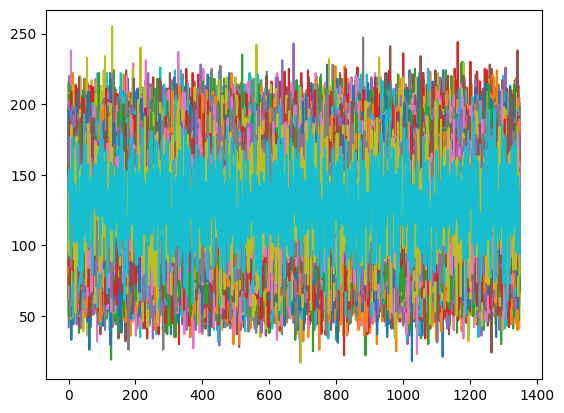

In [24]:
for i in range(1,1001):
    df[f'heart_rate{i}'].plot()
    
plt.show()

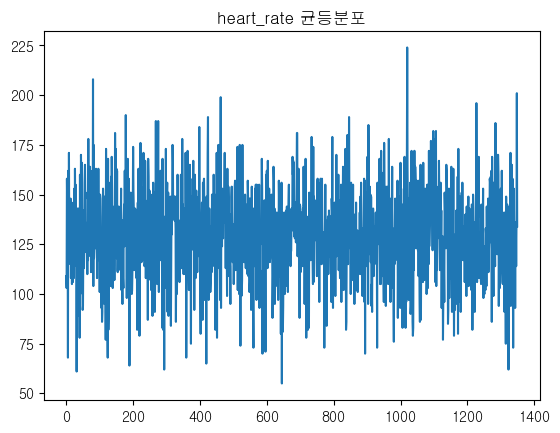

In [27]:
# plt.plot(df['heart_rate1'])

df['heart_rate1'].plot()

plt.title('heart_rate 균등분포')
plt.show()  

In [3]:
df_copy = df.copy()

# 데이터를 df_train과 df_test로 분할
df_train = df_copy[:1008]
df_test = df_copy[1008:]

print(df_copy.head())

print(df_train.shape)
print(df_test.shape)


           update_time  heart_rate1  event1  heart_rate2  event2  heart_rate3  \
0  2023-10-01 00:00:00          109       0          181       1          121   
1  2023-10-01 00:10:00          103       0          105       0          175   
2  2023-10-01 00:20:00          158       0          153       0          178   
3  2023-10-01 00:30:00          140       0          115       0          145   
4  2023-10-01 00:40:00          143       0          118       0          100   

   event3  heart_rate4  event4  heart_rate5  ...  heart_rate996  event996  \
0       0          122       0          167  ...            136         0   
1       0          158       0          165  ...            155         0   
2       0          143       0          131  ...            146         0   
3       0          131       0          124  ...            142         0   
4       0          136       0          184  ...            109         0   

   heart_rate997  event997  heart_rate998  event99

In [4]:
for i in range(1, 1001):
    # ARIMA 모델 학습
    model = ARIMA(df_train[f'heart_rate{i}'], order=(2, 0, 1))
    result = model.fit()

    start_idx = 1008  # 테스트 데이터셋의 시작 인덱스
    end_idx = 1008 + len(df_test)  # 테스트 데이터셋의 끝 인덱스

    forecast = result.get_prediction(start=start_idx, end=end_idx, dynamic=False)

    # 신뢰구간과 예측값 할당
    forecast_ci = forecast.conf_int()

  # 데이터프레임에 신뢰구간 추가
    df_test[f'lower_{i}'] = forecast_ci.iloc[:, 0]
    df_test[f'upper_{i}'] = forecast_ci.iloc[:, 1]

    # 'pred_y{i}' 열이 이미 존재하는 경우 삭제하고 다시 추가 (insert 메서드 사용)
    if f'pred_y{i}' in df_test.columns:
        df_test.drop(columns=[f'pred_y{i}'], inplace=True)

    # 'pred_y{i}' 열을 'event{i}' 뒤에 생성
    df_test.insert(df_test.columns.get_loc(f'event{i}') + 1, f'pred_y{i}', np.where((df_test[f'heart_rate{i}'] < df_test[f'lower_{i}']) | (df_test[f'heart_rate{i}'] > df_test[f'upper_{i}']), 1, 0))

    # 'pred{i}', 'lower_{i}', 'upper_{i} 삭제
    if f'pred{i}' in df_test.columns:
        df_test.drop(columns=[f'pred{i}'], inplace = True)
    if f'lower_{i}' in df_test.columns:
        df_test.drop(columns=[f'lower_{i}'], inplace = True)
    if f'upper_{i}' in df_test.columns:
        df_test.drop(columns=[f'upper_{i}'], inplace = True)

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\arimafd\arima\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\arimafd\arima\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jun99\AppData\Local\Temp\ipykernel_27672\1820725872.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[f'lower_{i}'] = forecast_ci.iloc[:, 0]
C:\Users\j

In [5]:
df_test

,update_time,heart_rate1,event1,pred_y1,heart_rate2,event2,pred_y2,heart_rate3,event3,pred_y3,...,pred_y997,heart_rate998,event998,pred_y998,heart_rate999,event999,pred_y999,heart_rate1000,event1000,pred_y1000
1008,2023-10-08 00:00:00,112,0,0,144,0,0,120,0,0,...,0,131,0,0,118,0,0,113,0,0
1009,2023-10-08 00:10:00,138,0,0,135,0,0,108,0,0,...,0,125,0,0,156,0,0,150,0,0
1010,2023-10-08 00:20:00,153,0,0,85,0,0,106,0,0,...,0,88,0,0,95,0,0,115,0,0
1011,2023-10-08 00:30:00,131,0,0,96,0,0,110,0,0,...,0,120,0,0,142,0,0,120,0,0
1012,2023-10-08 00:40:00,169,0,0,107,0,0,113,0,0,...,0,145,0,0,146,0,0,117,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2023-10-10 08:10:00,136,0,0,165,0,0,123,0,0,...,1,138,0,0,145,0,0,148,0,0
1346,2023-10-10 08:20:00,114,0,0,127,0,0,147,0,0,...,0,155,0,0,117,0,0,106,0,0
1347,2023-10-10 08:30:00,136,0,0,151,0,0,178,0,1,...,0,95,0,0,151,0,0,139,0,0
1348,2023-10-10 08:40:00,201,1,1,133,0,0,134,0,0,...,0,108,0,0,105,0,0,94,0,0


In [6]:
from performance import performance

In [7]:
result = pd.DataFrame()

for i in range(1,1001):

    TP = len(df_test[(df_test[f'event{i}']==1)&(df_test[f'pred_y{i}']==1)])
    TN = len(df_test[(df_test[f'event{i}']==0)&(df_test[f'pred_y{i}']==0)])
    FN = len(df_test[(df_test[f'event{i}']==1)&(df_test[f'pred_y{i}']==0)])
    FP = len(df_test[(df_test[f'event{i}']==0)&(df_test[f'pred_y{i}']==1)])


    result_i = performance(TP=TP, TN=TN, FP=FP, FN=FN, BETA=1)
    
    result = pd.concat([result, result_i])


result.head(2)

,Sensitivity,Specificity,Accuracy,PPV,NPV,F_1 score
0,100.0,97.575758,97.660819,60.0,100.0,75.000000
0,100.0,98.470948,98.538012,75.0,100.0,85.714286


In [8]:
uniform_격렬_젊음_5 = pd.DataFrame(index=['mean'])

uniform_격렬_젊음_5['mean_sens'] = result['Sensitivity'].mean()
uniform_격렬_젊음_5['std_sens'] = result['Sensitivity'].std()
uniform_격렬_젊음_5['mean_spec'] = result['Specificity'].mean()
uniform_격렬_젊음_5['std_spec'] = result['Specificity'].std()
uniform_격렬_젊음_5['mean_accu'] = result['Accuracy'].mean()
uniform_격렬_젊음_5['std_accu'] = result['Accuracy'].std()
uniform_격렬_젊음_5['mean_ppv'] = result['PPV'].mean()
uniform_격렬_젊음_5['std_ppv'] = result['PPV'].std()
uniform_격렬_젊음_5['mean_npv'] = result['NPV'].mean()
uniform_격렬_젊음_5['std_npv'] = result['NPV'].std()
uniform_격렬_젊음_5['mean_F1_score'] = result['F_1 score'].mean()
uniform_격렬_젊음_5['std_F1_score'] = result['F_1 score'].std()

uniform_격렬_젊음_5

,mean_sens,std_sens,mean_spec,std_spec,mean_accu,std_accu,mean_ppv,std_ppv,mean_npv,std_npv,mean_F1_score,std_F1_score
mean,99.752647,1.96926,98.804,0.801702,98.842398,0.764168,77.931808,12.820441,99.991517,0.062929,86.875161,8.352606


In [9]:
uniform_격렬_젊음_5.to_csv('../../../분석 연습/result/uniform_격렬_젊음_5.csv', encoding='cp949')